In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import random
from tqdm import tqdm
import cv2

characters = np.load('/Users/dhritikothari/Desktop/StyledFontGAN/character_font.npz')['images']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
class Encoder(nn.Module):

  def __init__(self, seed_size, img_channel):

    super(Encoder, self).__init__()
    self.encoder = nn.Sequential(

        nn.Conv2d(img_channel, 64, 4, 2, 1, bias=False),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(64, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(128, 256, 4, 2, 1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(256, 512, 4, 2, 1, bias=False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace=True),
    )
    self.mu_fc = nn.Conv2d(512, seed_size, 2, 1, 0, bias=False)
    self.sigma_fc = nn.Conv2d(512, seed_size, 2, 1, 0, bias=False)
    self.kl = 0

  def forward(self,input,N):
    encoded = self.encoder(input)
    mu = self.mu_fc(encoded).mean([-2,-1])
    sigma = torch.exp(self.sigma_fc(encoded).mean([-2,-1]))
    z = mu + sigma*N.sample(mu.shape)
    self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
    return z








In [13]:
class Decoder(nn.Module):

  def __init__(self, seed_size, img_channel):

    super(Decoder, self).__init__()

    self.conv_transpose_block_1 = nn.Sequential(
        nn.ConvTranspose2d(seed_size, 512, 4, 1, 0, bias=False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace=True))

    self.conv_transpose_block_2 = nn.Sequential(
        nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True))

    self.conv_transpose_block_3 = nn.Sequential(
        nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True))

    self.conv_transpose_block_4 = nn.Sequential(
        nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2, inplace=True))

    self.conv_transpose_block_5 = nn.Sequential(
        nn.ConvTranspose2d(64, img_channel, 1, 1, 0, bias=False),
        nn.Sigmoid())

  def forward(self, input):
    input = self.conv_transpose_block_1(input)
    input = self.conv_transpose_block_2(input)
    input = self.conv_transpose_block_3(input)
    input = self.conv_transpose_block_4(input)
    input = self.conv_transpose_block_5(input)
    return input


In [7]:
class Discriminator(nn.Module):

  def __init__(self, img_channel, num_classes):

    super(Discriminator, self).__init__()
    self.block = nn.Sequential(

        nn.Conv2d(img_channel, 32, 4, 2, 1, bias=False),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(32, 64, 4, 2, 1, bias=False),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(64, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(128, 256, 4, 2, 1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(256, 512, 4, 2, 1, bias=False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace=True),
    )

    self.dis_out = nn.Conv2d(512, 1, 1, 1, 0, bias=False)
    self.pred = nn.Sequential(
        nn.Conv2d(512, num_classes, 1, 1, 0, bias=False),
        nn.Softmax(dim=1)
    )

def forward(self,input):
    x = self.block(input)
    return self.dis_out(x), self.pred(x)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# Define the Encoder class


# Define the Decoder class


# Define the Discriminator class
class Discriminator(nn.Module):
    def __init__(self, img_channel, num_classes):
        super(Discriminator, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(img_channel, 32, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.dis_out = nn.Conv2d(512, 1, 1, 1, 0, bias=False)
        self.pred = nn.Sequential(
            nn.Conv2d(512, num_classes, 1, 1, 0, bias=False),
            nn.Softmax(dim=1)
        )

    def forward(self, input):
        x = self.block(input)
        return self.dis_out(x), self.pred(x)

# Helper function to get one-hot encoding
def get_one_hot(a, num_classes):
    return torch.eye(num_classes)[a]

# Custom dataset class for .npz file
class NPZDataset(Dataset):
    def __init__(self, file_path):
        data = np.load(file_path)
        self.images = data['images']
        self.labels = data['labels']

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        label = torch.tensor(label, dtype=torch.long)
        return image, label

# Load dataset
dataset = NPZDataset('/Users/dhritikothari/Desktop/StyledFontGAN/character_font.npz')
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize models
seed_size = 128
num_class = 26
img_ch = 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs = 5 
learning_rate = 0.0002

enc = Encoder(seed_size, img_ch).to(device)
gen = Decoder(seed_size + num_class, img_ch).to(device)
dis = Discriminator(img_ch, num_class).to(device)

# Optimizers
optimizer_enc = optim.Adam(enc.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_gen = optim.Adam(gen.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_dis = optim.Adam(dis.parameters(), lr=learning_rate, betas=(0.5, 0.999))

# Loss functions
criterion_gan = nn.BCEWithLogitsLoss()
criterion_class = nn.CrossEntropyLoss()
criterion_recon = nn.MSELoss()

N = torch.distributions.Normal(torch.tensor(0.0).to(device), torch.tensor(1.0).to(device))

# Training loop
for epoch in range(epochs):
    for batch_idx, (data, labels) in enumerate(train_loader):
        data = data.to(device)
        labels = labels.to(device)

        batch_size_current = data.size(0)

        # Train Discriminator
        optimizer_dis.zero_grad()

        real_labels = torch.ones((batch_size_current, 1, 1, 1)).to(device)
        fake_labels = torch.zeros((batch_size_current, 1, 1, 1)).to(device)

        real_output, class_output = dis(data)
        d_real_loss = criterion_gan(real_output, real_labels)
        class_loss = criterion_class(class_output.squeeze(), labels)

        latent = enc(data, N)
        one_hot_labels = get_one_hot(labels, num_class).to(device)
        latent = torch.cat([latent, one_hot_labels], dim=1).unsqueeze(-1).unsqueeze(-1)
        fake_data = gen(latent)

        fake_output, _ = dis(fake_data.detach())
        d_fake_loss = criterion_gan(fake_output, fake_labels)

        d_loss = d_real_loss + d_fake_loss + class_loss
        d_loss.backward()
        optimizer_dis.step()

        # Train Generator
        optimizer_gen.zero_grad()

        fake_output, class_output = dis(fake_data)
        g_gan_loss = criterion_gan(fake_output, real_labels)
        g_class_loss = criterion_class(class_output.squeeze(), labels)
        g_recon_loss = criterion_recon(fake_data, data)

        g_loss = g_gan_loss + g_class_loss + g_recon_loss
        g_loss.backward()
        optimizer_gen.step()

        # Train Encoder
        optimizer_enc.zero_grad()

        latent = enc(data, N)
        latent = torch.cat([latent, one_hot_labels], dim=1).unsqueeze(-1).unsqueeze(-1)
        fake_data = gen(latent)
        e_recon_loss = criterion_recon(fake_data, data)

        e_loss = e_recon_loss + enc.kl
        e_loss.backward()
        optimizer_enc.step()

        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch}/{epochs}], Step [{batch_idx}/{len(train_loader)}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}, E Loss: {e_loss.item()}')

# Save the trained model weights
torch.save(enc.state_dict(), 'enc.pt')
torch.save(gen.state_dict(), 'gen.pt')
torch.save(dis.state_dict(), 'dis.pt')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [0/5], Step [0/12181], D Loss: 4.67482328414917, G Loss: 14197.38671875, E Loss: 18668.25390625
Epoch [0/5], Step [100/12181], D Loss: 3.770305871963501, G Loss: 12992.158203125, E Loss: 14434.43359375
Epoch [0/5], Step [200/12181], D Loss: 3.303623914718628, G Loss: 14583.3828125, E Loss: 16014.720703125
Epoch [0/5], Step [300/12181], D Loss: 3.1301450729370117, G Loss: 14435.826171875, E Loss: 15874.501953125
Epoch [0/5], Step [400/12181], D Loss: 2.9868268966674805, G Loss: 13439.5068359375, E Loss: 14863.4404296875
Epoch [0/5], Step [500/12181], D Loss: 3.4872448444366455, G Loss: 14638.2998046875, E Loss: 16061.1953125
Epoch [0/5], Step [600/12181], D Loss: 2.931657314300537, G Loss: 13994.0263671875, E Loss: 15419.8798828125
Epoch [0/5], Step [700/12181], D Loss: 3.0250141620635986, G Loss: 13714.0, E Loss: 15136.0185546875
Epoch [0/5], Step [800/12181], D Loss: 2.8506858348846436, G Loss: 14651.4287109375, E Loss: 16070.0400390625
Epoch [0/5], Step [900/12181], D Loss: 2.9

KeyboardInterrupt: 

In [18]:
class Encoder(nn.Module):

  def __init__(self, seed_size, img_channel):

    super(Encoder, self).__init__()
    self.encoder = nn.Sequential(

        nn.Conv2d(img_channel, 64, 4, 2, 1, bias=False),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(64, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(128, 256, 4, 2, 1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(256, 512, 4, 2, 1, bias=False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace=True),
    )
    self.mu_fc = nn.Conv2d(512, seed_size, 2, 1, 0, bias=False)
    self.sigma_fc = nn.Conv2d(512, seed_size, 2, 1, 0, bias=False)
    self.kl = 0

  def forward(self,input,N):
    encoded = self.encoder(input)
    mu = self.mu_fc(encoded).mean([-2,-1])
    sigma = torch.exp(self.sigma_fc(encoded).mean([-2,-1]))
    z = mu + sigma*N.sample(mu.shape)
    self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
    return z

class Decoder(nn.Module):

  def __init__(self, seed_size, img_channel):

    super(Decoder, self).__init__()

    self.conv_transpose_block_1 = nn.Sequential(
        nn.ConvTranspose2d(seed_size, 512, 4, 1, 0, bias=False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace=True))

    self.conv_transpose_block_2 = nn.Sequential(
        nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True))

    self.conv_transpose_block_3 = nn.Sequential(
        nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True))

    self.conv_transpose_block_4 = nn.Sequential(
        nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2, inplace=True))

    self.conv_transpose_block_5 = nn.Sequential(
        nn.ConvTranspose2d(64, img_channel, 1, 1, 0, bias=False),
        nn.Sigmoid())

  def forward(self, input):
    input = self.conv_transpose_block_1(input)
    input = self.conv_transpose_block_2(input)
    input = self.conv_transpose_block_3(input)
    input = self.conv_transpose_block_4(input)
    input = self.conv_transpose_block_5(input)
    return input

class Discriminator(nn.Module):

  def __init__(self, img_channel, num_classes):

    super(Discriminator, self).__init__()
    self.block = nn.Sequential(

        nn.Conv2d(img_channel, 32, 4, 2, 1, bias=False),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(32, 64, 4, 2, 1, bias=False),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(64, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(128, 256, 4, 2, 1, bias=False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),

        nn.Conv2d(256, 512, 4, 2, 1, bias=False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace=True),
    )

    self.dis_out = nn.Conv2d(512, 1, 1, 1, 0, bias=False)
    self.pred = nn.Sequential(
        nn.Conv2d(512, num_classes, 1, 1, 0, bias=False),
        nn.Softmax(dim=1)
    )

  def forward(self,input):
    x = self.block(input)
    return self.dis_out(x), self.pred(x)

def plotter(images):
  f = -(-len(images)//3)
  fig,ax = plt.subplots(3,f,figsize=(5*f, 15))
  for i in range(len(images)):
    ax[i%3,i//3].imshow(images[i,0])
  for aa in ax:
    for aaa in aa:
      aaa.axis("off")
  plt.show()

def get_one_hot(a, maximum=25):
  b = np.zeros((a.size, maximum + 1))
  b[np.arange(a.size), a] = 1
  return b

seed_size = 128
num_class = 26
img_ch = 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

enc = Encoder(seed_size, img_ch).to(device)
gen = Decoder(seed_size+num_class, img_ch).to(device)
dis = Discriminator(img_ch, num_class).to(device)
gen.load_state_dict(torch.load('/Users/dhritikothari/Desktop/StyledFontGAN/weights/gen.pt',map_location=device))
dis.load_state_dict(torch.load('/Users/dhritikothari/Desktop/StyledFontGAN/weights/dis.pt',map_location=device))
enc.load_state_dict(torch.load('/Users/dhritikothari/Desktop/StyledFontGAN/weights/enc.pt',map_location=device))
N = torch.distributions.Normal(torch.tensor(0).float().to(device), torch.tensor(1).float().to(device))

@torch.no_grad()
def get_latent(img):
    if img is not None:
        enc.eval()
        latent = enc(torch.tensor(img).float().to(device), N)
        return latent[0].cpu().reshape(1,-1)
    else:
        return torch.randn(1, seed_size).to(device)

@torch.no_grad()
def get_demo(latent):
    gen.eval()
    visualize_noise = latent
    visualize_noise = torch.cat([visualize_noise for _ in range(num_class)], axis=0)
    onehot = torch.tensor(get_one_hot(np.arange(num_class)))
    visualize_noise = torch.cat([visualize_noise,onehot],axis=1).reshape(num_class,-1,1,1)
    pred = gen(visualize_noise.float())
    return pred

@torch.no_grad()
def get_predictions(text, latent):
    gen.eval()
    order = []
    for i in text.upper():
        o = ord(i)-65
        if o < 0 or 0 > 25:
            order.append(26)
        else:
            order.append(o)
    onehot = torch.tensor(get_one_hot(np.array(order), 26)[:,:26])
    visualize_noise = torch.cat([latent for _ in range(len(onehot))],axis=0)
    visualize_noise = torch.cat([visualize_noise,onehot],axis=1).reshape(len(onehot),-1,1,1)
    pred = gen(visualize_noise.float())
    for i, num in enumerate(order):
        if num == 26:
            pred[i] = 0*pred[i]
    return pred

In [20]:
def plotter(images):
  f = -(-len(images)//3)
  fig,ax = plt.subplots(3,f,figsize=(5*f, 15))
  for i in range(len(images)):
    ax[i%3,i//3].imshow(images[i,0])
  for aa in ax:
    for aaa in aa:
      aaa.axis("off")
  plt.show()

def get_one_hot(a, maximum=25):
  b = np.zeros((a.size, maximum + 1))
  b[np.arange(a.size), a] = 1
  return b

seed_size = 128
num_class = 26
img_ch = 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

enc = Encoder(seed_size, img_ch).to(device)
gen = Decoder(seed_size+num_class, img_ch).to(device)
dis = Discriminator(img_ch, num_class).to(device)
gen.load_state_dict(torch.load('/Users/dhritikothari/Desktop/StyledFontGAN/weights/gen.pt',map_location=device))
dis.load_state_dict(torch.load('/Users/dhritikothari/Desktop/StyledFontGAN/weights/dis.pt',map_location=device))
enc.load_state_dict(torch.load('/Users/dhritikothari/Desktop/StyledFontGAN/weights/enc.pt',map_location=device))
N = torch.distributions.Normal(torch.tensor(0).float().to(device), torch.tensor(1).float().to(device))

@torch.no_grad()
def get_latent(img):
    if img is not None:
        enc.eval()
        latent = enc(torch.tensor(img).float().to(device), N)
        return latent[0].cpu().reshape(1,-1)
    else:
        return torch.randn(1, seed_size).to(device)

@torch.no_grad()
def get_demo(latent):
    gen.eval()
    visualize_noise = latent
    visualize_noise = torch.cat([visualize_noise for _ in range(num_class)], axis=0)
    onehot = torch.tensor(get_one_hot(np.arange(num_class)))
    visualize_noise = torch.cat([visualize_noise,onehot],axis=1).reshape(num_class,-1,1,1)
    pred = gen(visualize_noise.float())
    return pred

@torch.no_grad()
def get_predictions(text, latent):
    gen.eval()
    order = []
    for i in text.upper():
        o = ord(i)-65
        if o < 0 or 0 > 25:
            order.append(26)
        else:
            order.append(o)
    onehot = torch.tensor(get_one_hot(np.array(order), 26)[:,:26])
    visualize_noise = torch.cat([latent for _ in range(len(onehot))],axis=0)
    visualize_noise = torch.cat([visualize_noise,onehot],axis=1).reshape(len(onehot),-1,1,1)
    pred = gen(visualize_noise.float())
    for i, num in enumerate(order):
        if num == 26:
            pred[i] = 0*pred[i]
    return pred

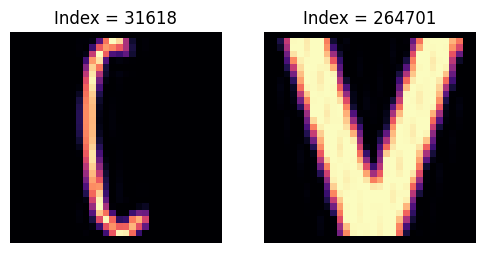

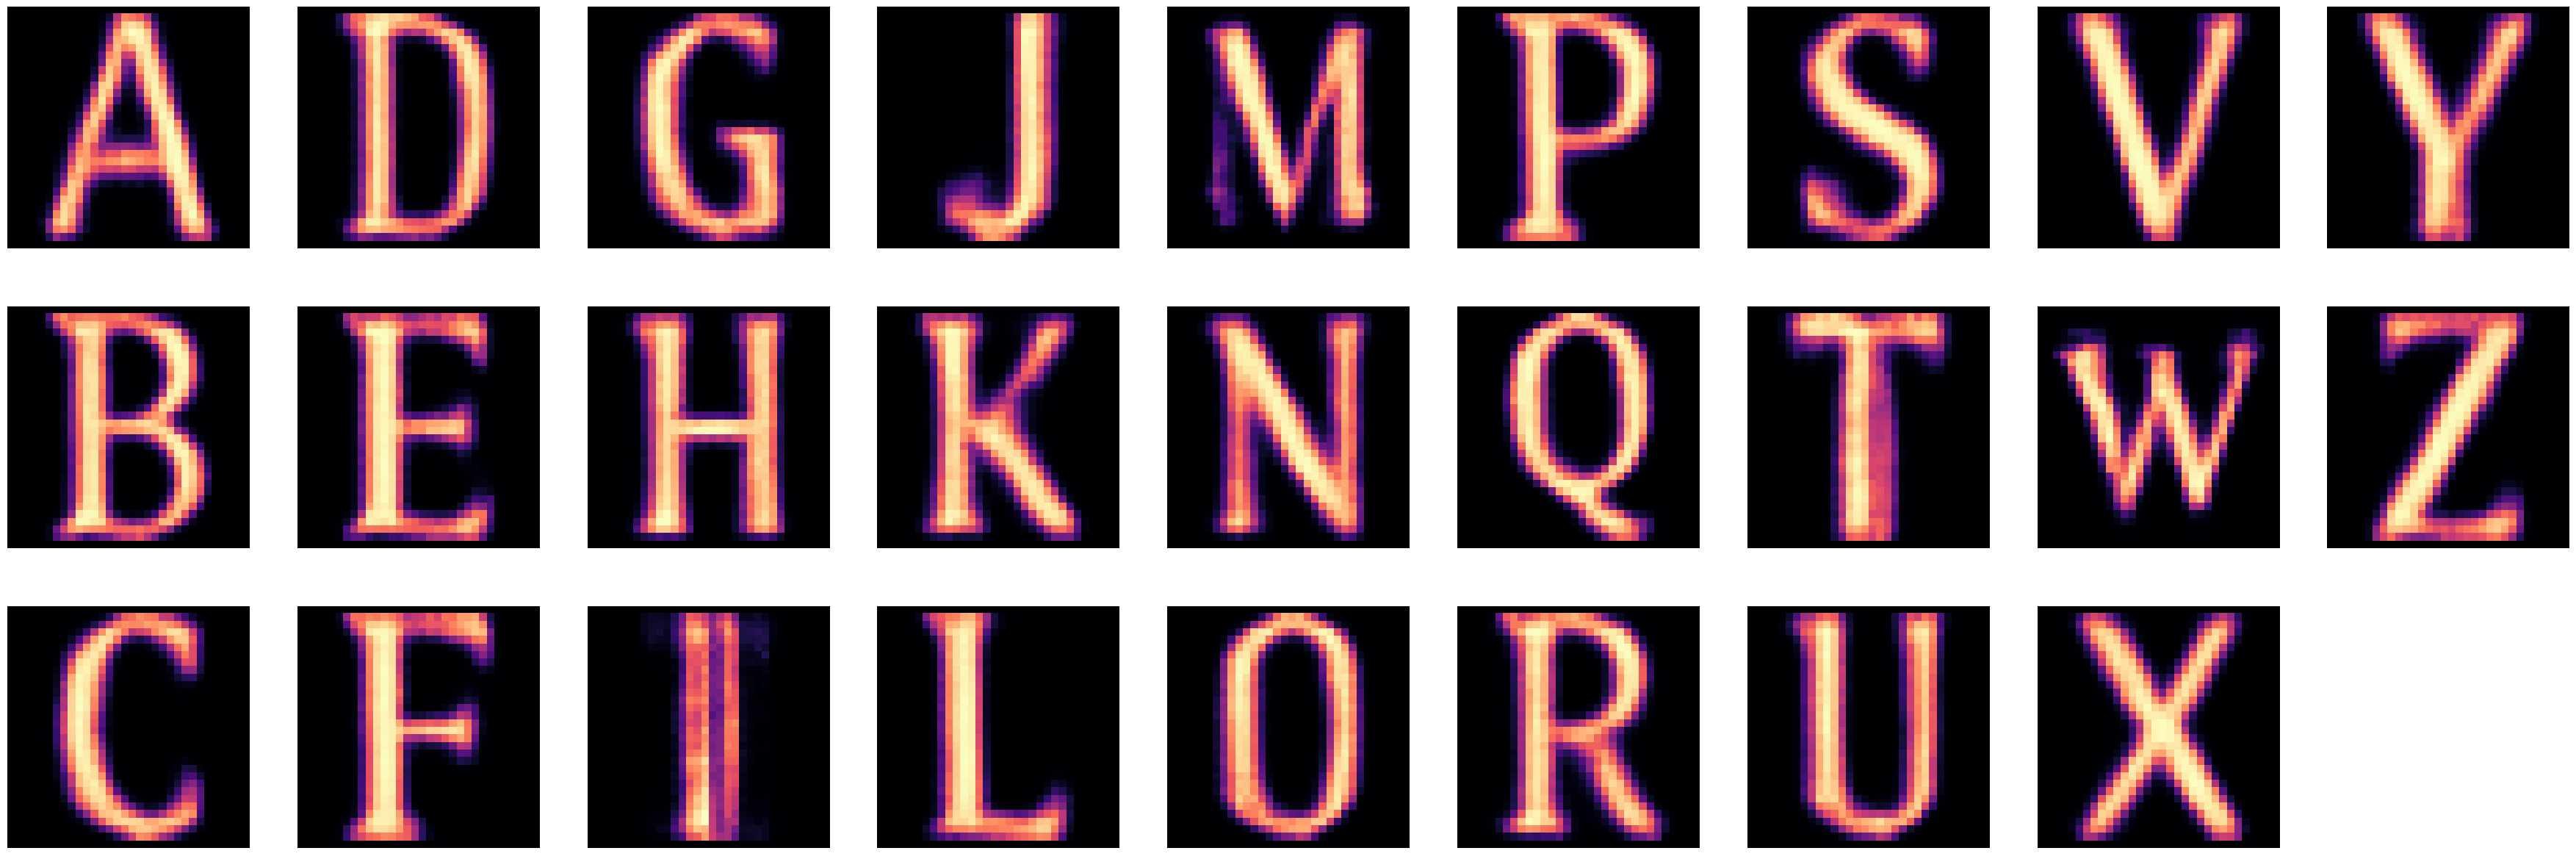

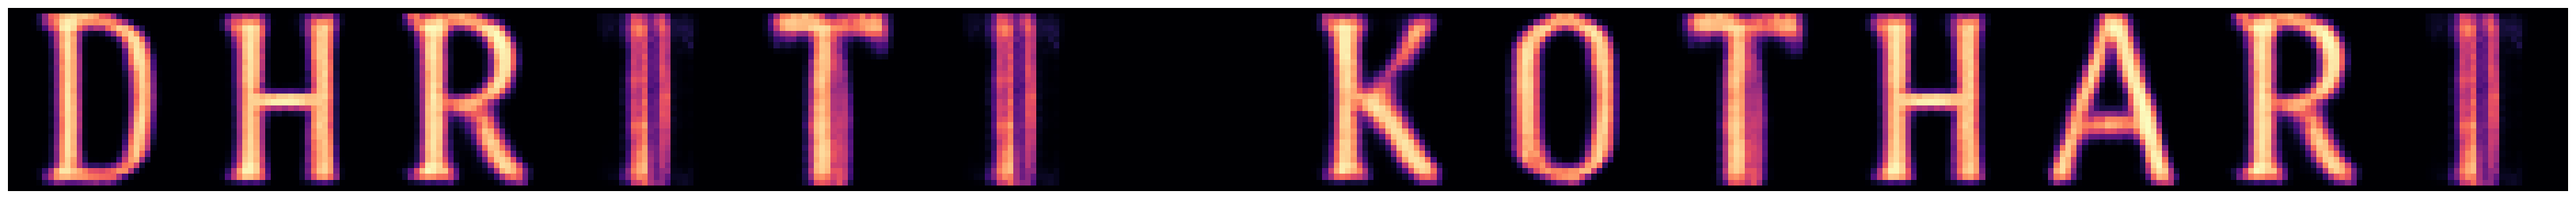

In [21]:
import matplotlib as mpl
mpl.rc('image', cmap='magma')

n = 2
idx = np.random.choice(np.arange(characters.shape[0]), n, replace=False)
fig, ax = plt.subplots(1,n,figsize=(n*3,3))
images = []
for i, j in enumerate(idx):
    ax[i].set_title(f"Index = {j}")
    img = characters[j].reshape(1,1,32,32)/255
    images.append(img)
    ax[i].imshow(img[0,0])
    ax[i].axis('off')

with torch.no_grad():
    latent = sum([get_latent(im) for im in images])/n
    pred = get_demo(latent)
    plotter(pred.cpu())
    pred = get_predictions("Dhriti Kothari", latent)
    plt.figure(figsize=(len(pred)*3,3))
    plt.imshow(np.concatenate(list(pred.cpu().numpy()),axis=2)[0])
    plt.axis('off')
    plt.show()

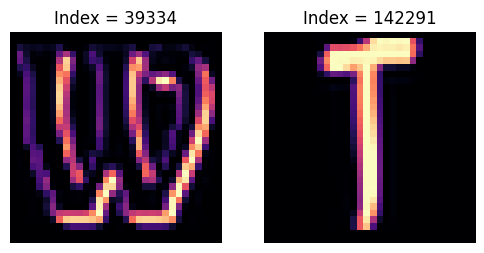

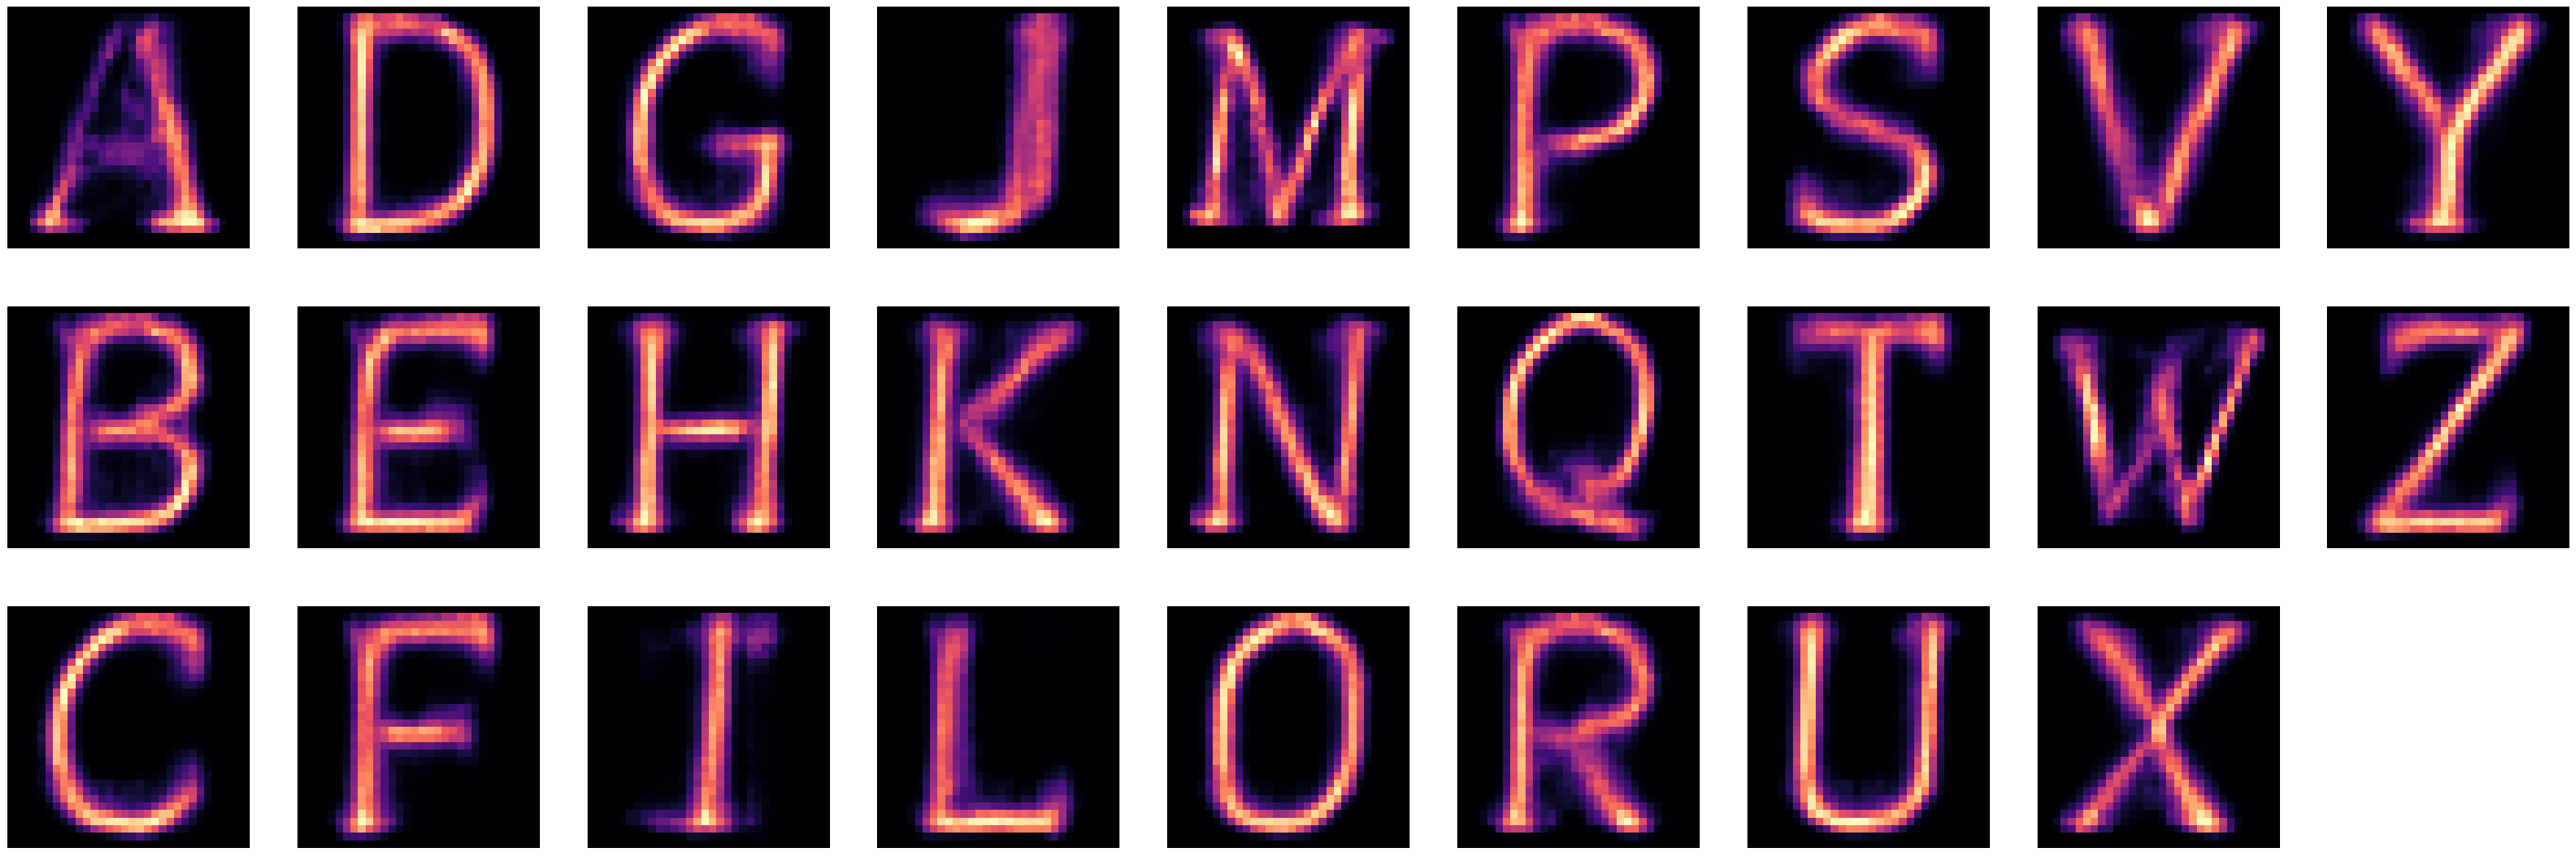

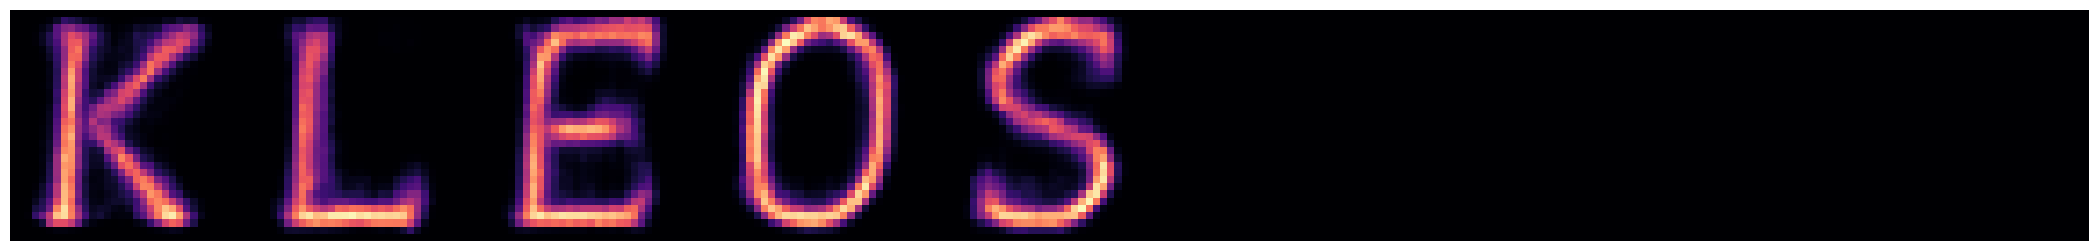

In [27]:
import matplotlib as mpl
mpl.rc('image', cmap='magma')

n = 2
idx = np.random.choice(np.arange(characters.shape[0]), n, replace=False)
fig, ax = plt.subplots(1,n,figsize=(n*3,3))
images = []
for i, j in enumerate(idx):
    ax[i].set_title(f"Index = {j}")
    img = characters[j].reshape(1,1,32,32)/255
    images.append(img)
    ax[i].imshow(img[0,0])
    ax[i].axis('off')

with torch.no_grad():
    latent = sum([get_latent(im) for im in images])/n
    pred = get_demo(latent)
    plotter(pred.cpu())
    pred = get_predictions("kleos ", latent)
    plt.figure(figsize=(len(pred)*3,3))
    plt.imshow(np.concatenate(list(pred.cpu().numpy()),axis=2)[0])
    plt.axis('off')
    plt.show()

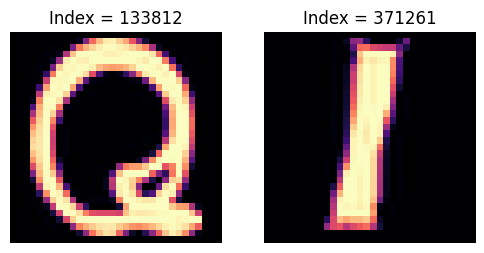

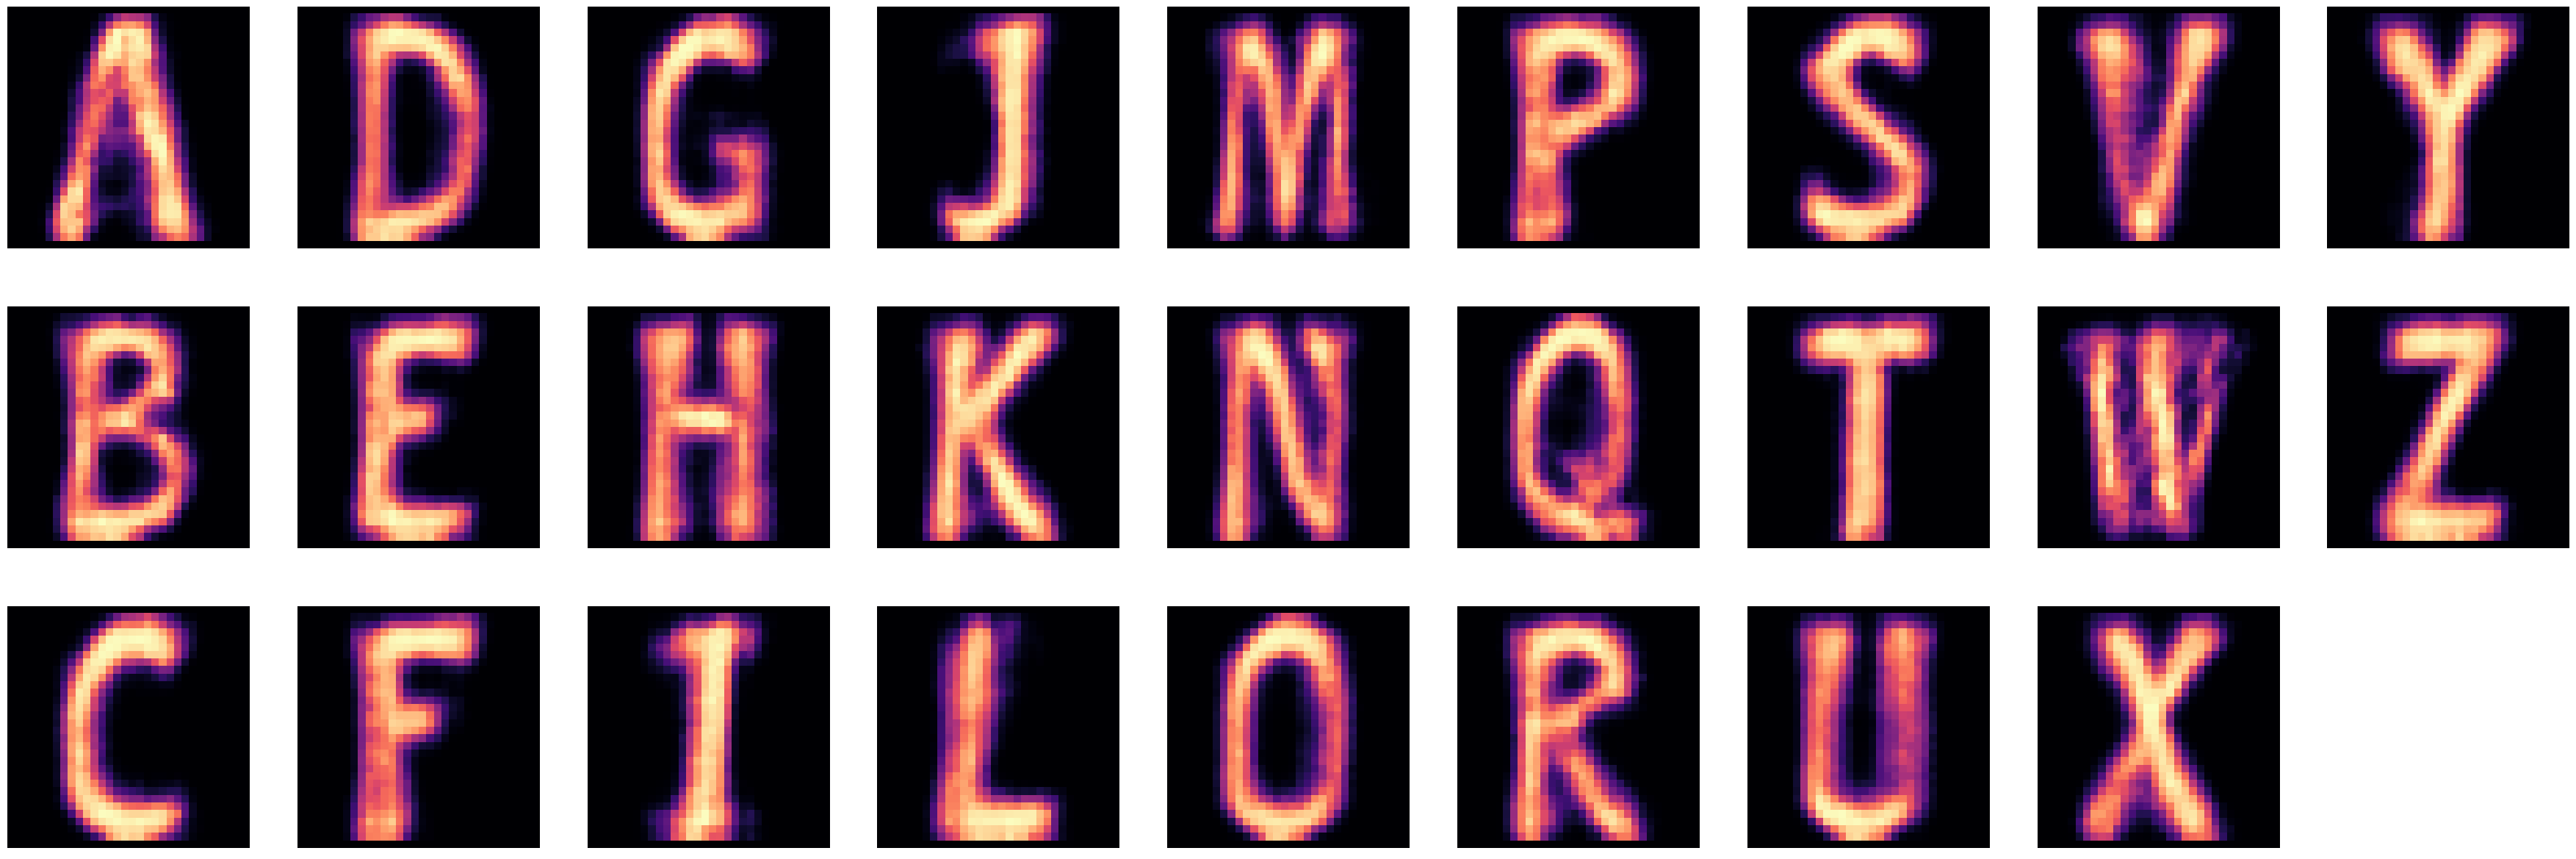

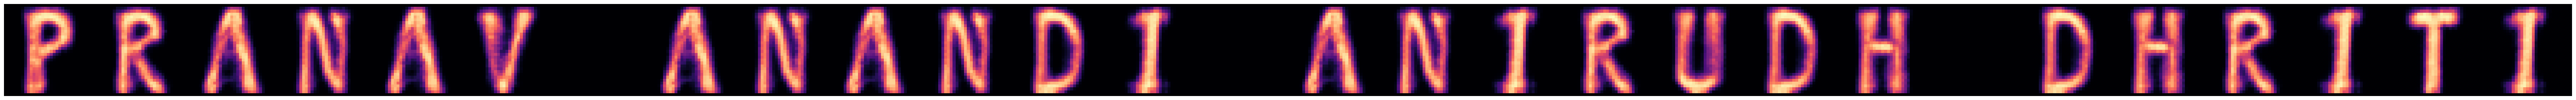

In [29]:
import matplotlib as mpl
mpl.rc('image', cmap='magma')

n = 2
idx = np.random.choice(np.arange(characters.shape[0]), n, replace=False)
fig, ax = plt.subplots(1,n,figsize=(n*3,3))
images = []
for i, j in enumerate(idx):
    ax[i].set_title(f"Index = {j}")
    img = characters[j].reshape(1,1,32,32)/255
    images.append(img)
    ax[i].imshow(img[0,0])
    ax[i].axis('off')

with torch.no_grad():
    latent = sum([get_latent(im) for im in images])/n
    pred = get_demo(latent)
    plotter(pred.cpu())
    pred = get_predictions("Pranav Anandi Anirudh Dhriti", latent)
    plt.figure(figsize=(len(pred)*3,3))
    plt.imshow(np.concatenate(list(pred.cpu().numpy()),axis=2)[0])
    plt.axis('off')
    plt.show()

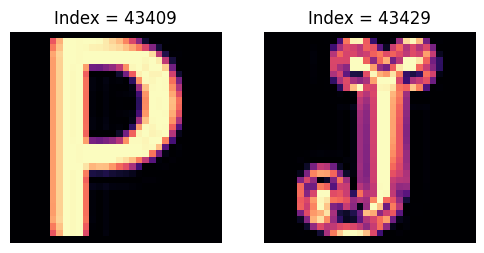

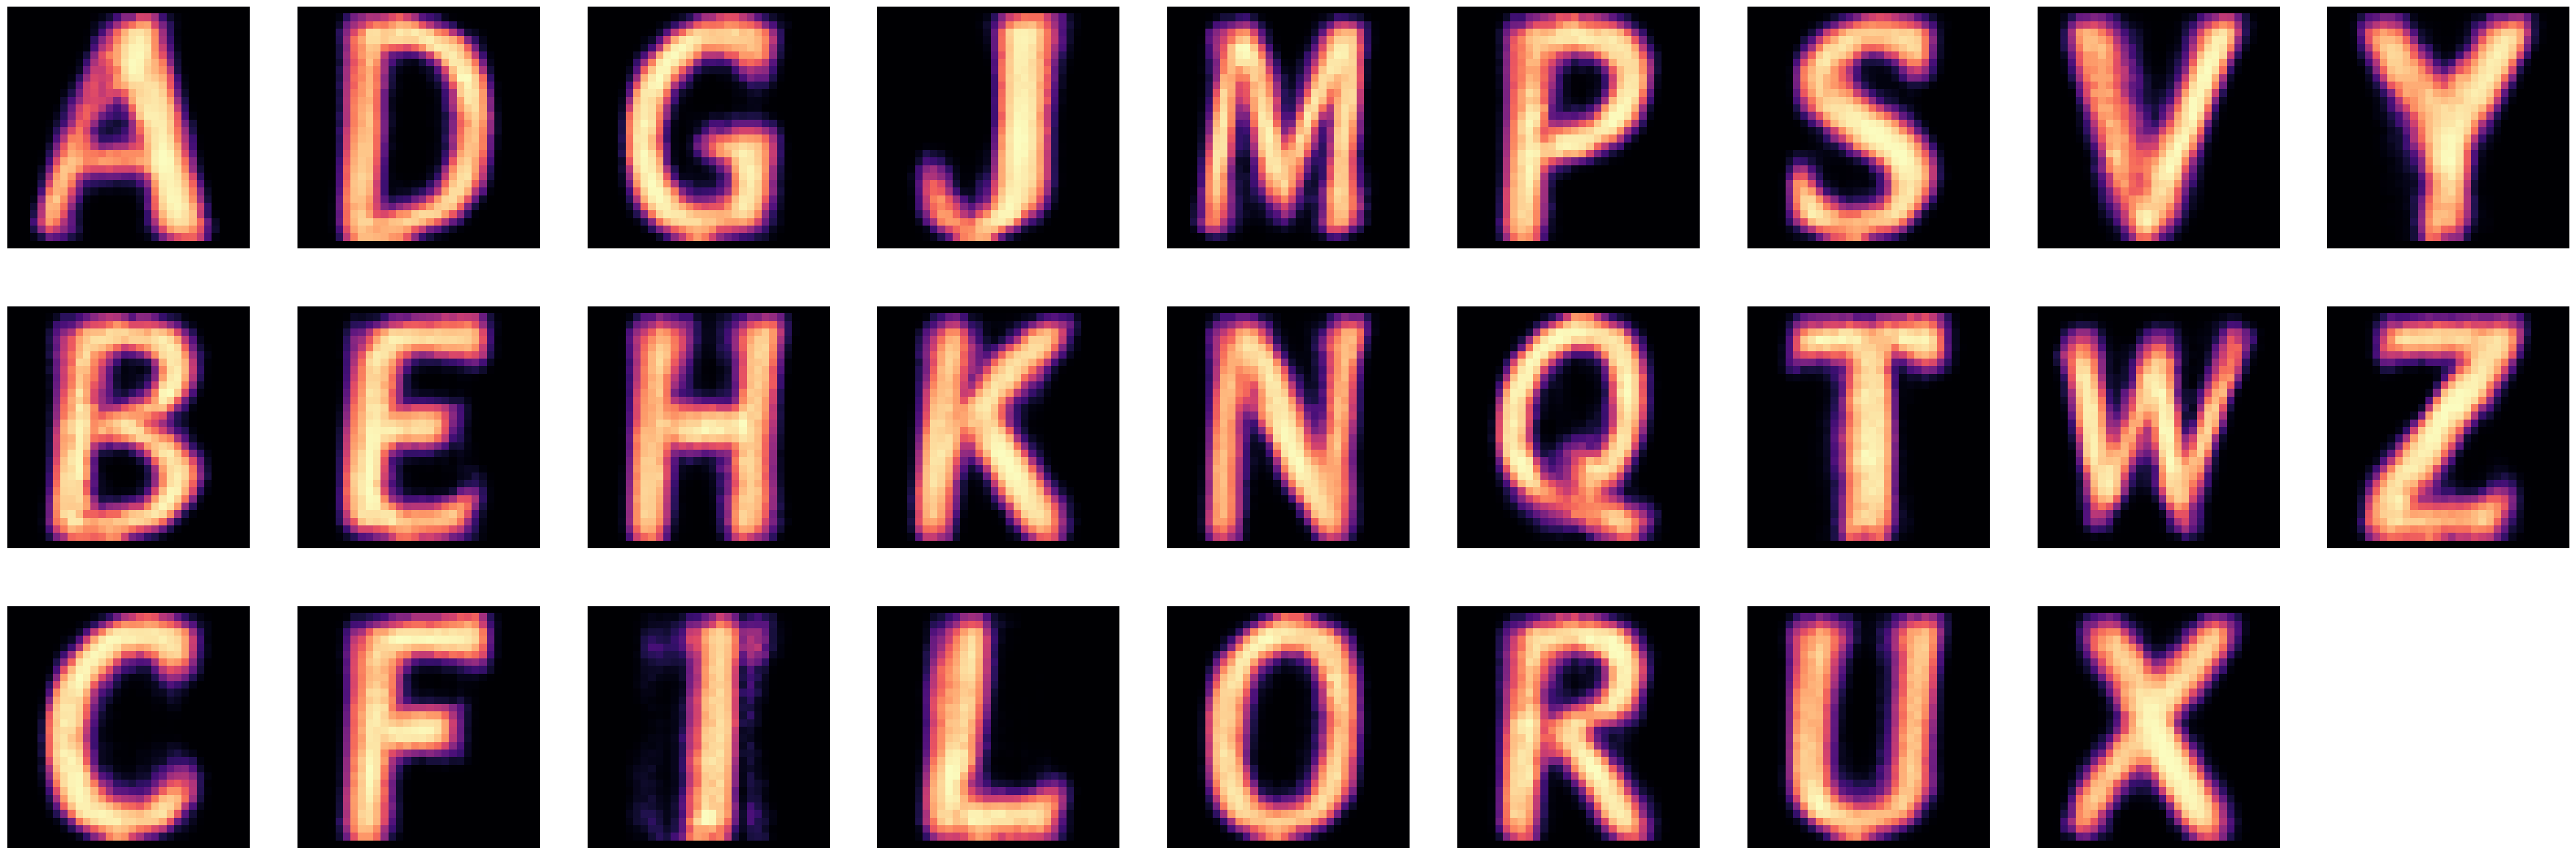

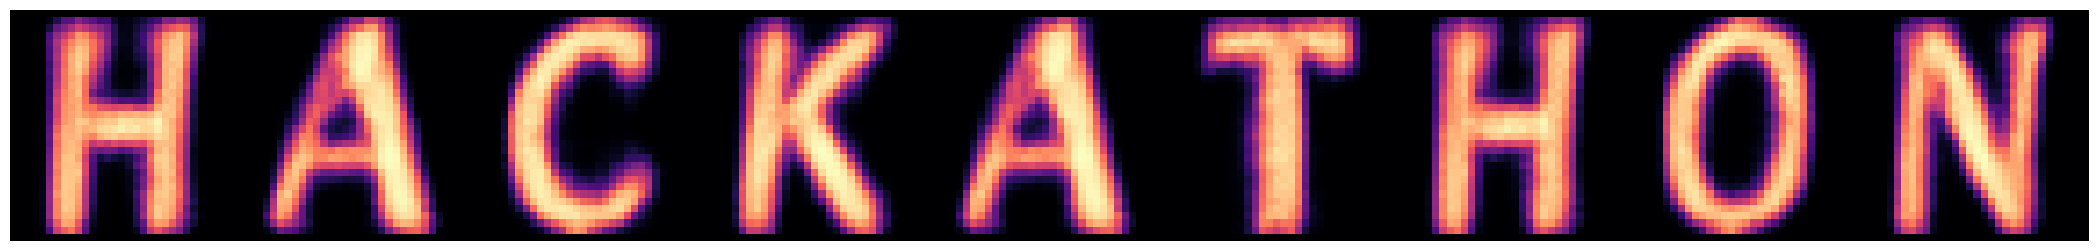

In [30]:
import matplotlib as mpl
mpl.rc('image', cmap='magma')

n = 2
idx = np.random.choice(np.arange(characters.shape[0]), n, replace=False)
fig, ax = plt.subplots(1,n,figsize=(n*3,3))
images = []
for i, j in enumerate(idx):
    ax[i].set_title(f"Index = {j}")
    img = characters[j].reshape(1,1,32,32)/255
    images.append(img)
    ax[i].imshow(img[0,0])
    ax[i].axis('off')

with torch.no_grad():
    latent = sum([get_latent(im) for im in images])/n
    pred = get_demo(latent)
    plotter(pred.cpu())
    pred = get_predictions("Hackathon", latent)
    plt.figure(figsize=(len(pred)*3,3))
    plt.imshow(np.concatenate(list(pred.cpu().numpy()),axis=2)[0])
    plt.axis('off')
    plt.show()